$$\huge{\text{Module 5-Neural Nets}}$$

In [1]:
#%run packages
#%matplotlib inline
import matplotlib.pyplot as plt

# Neural Net Architecture 




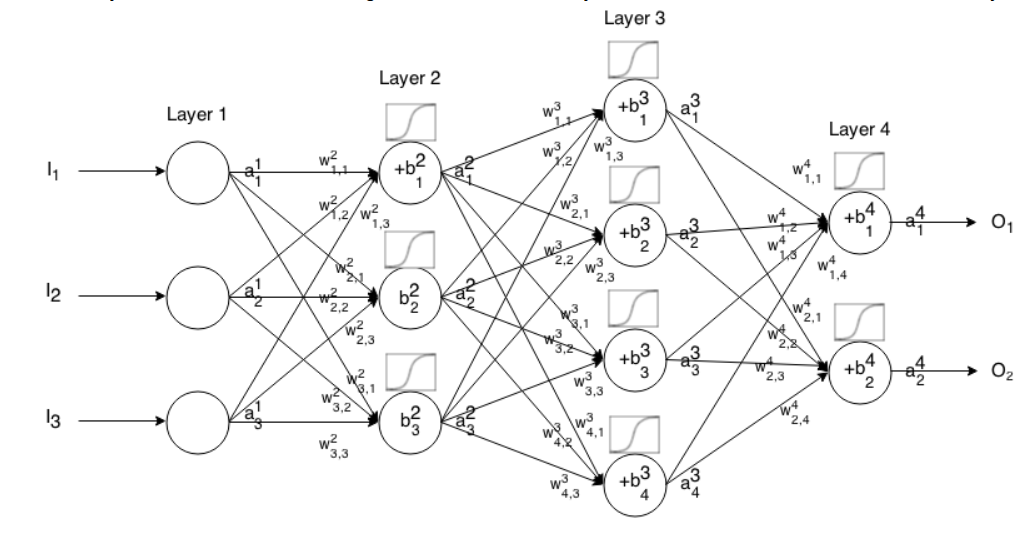

<font size=4>
To move from one layer to the next we use Matrices for example to get from the input layer to the first hidden layer we would multiply the ($1\times 3$) vector in the input layer by a matrix $W^2_{3\times 3}$ (Note in math we normally multiply matrices on the left so all the dimensions are reversed from many of the applications we have seen before.)  What would be the dimensions of the matrix $W^3$ that would go from hidden layer 2 to the output layer?

The S shaped curve in the box indicates a non-linear step ( a siggmoid function for example)/  Usually referred to as activation.  

In Classification OUR GOAL is to find values for $W^k$  that minimize the Error between our output values and our targets.  The way we have been doing this so far is to have a cost function dependent on the weights $W^k_{i,j}$ and use Gradient Descent. 


<font size=4>
We are going to use the $\log$ of the sigmoid(logistic function) $\sigma(x)=\frac{1}{1+e^{-x}}$to compute our gradients and update our W.  Look back at Logistic regression to see properties of the derivative of $\log(\sigma(X))$.
$$\text{Derivative }\frac{d}{dt}\log (\sigma(t))=\sigma(-t) =1-\sigma(t)$$

$$W_{new}=W_{old}+(X.T)\nabla out \text{ with } \nabla out=(error)\frac{d(\sigma(out))}{dx}$$

MORE LATER!!!!

# <font color=blue>Let's try it on the iris data set. 

<font size=4> Now let's see how well we can do on the Iris data.    First let's get the iris data.

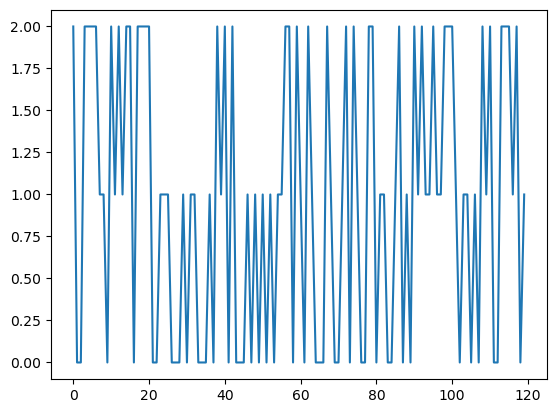

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
Xo = iris["data"]
yo = (iris["target"]).astype(int)
from sklearn.utils import shuffle
Xs,ys=shuffle(Xo,yo)
from sklearn.model_selection import train_test_split
X, X_test, yts, y_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)
yt=yts.reshape((120,1))
plt.plot(yt)


## Use SKlearn MLP.  First we will try just two hidden layers 

<font size=4>[MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) The primary parameters for us are 
    hidden_layer_sizesarray-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith hidden layer.

  
__activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’__
    Activation function for the hidden layer.

    ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
    ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
    ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
    ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
    
__hidden_layer_sizesarray-like of shape(n_layers - 2,), default=(100,)__
    
    The ith element represents the number of neurons in the ith hidden layer.

For todays purposes we will use the default activation and 2 hidden layers.    
    
    hidden_layer_sizes=(16,32)

How many did it miss 1.0


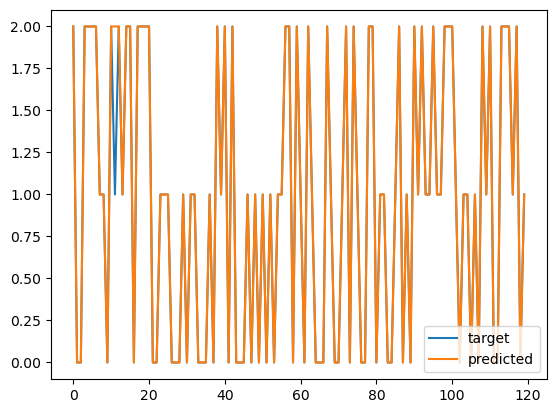

In [5]:

from sklearn.neural_network import MLPClassifier
import numpy as np
mlp = MLPClassifier(max_iter=1000,random_state=42,hidden_layer_sizes=(16,32))
mlp.fit(X, yts)
out=mlp.predict(X)
plt.plot(yt, label='target')
plt.plot(mlp.predict(X), label='predicted')
plt.legend()
print('How many did it miss',np.round(2*np.abs(out-yts)/3).sum())

<font size=4 color=blue> __Try 3 hidden layers.__  

How many did it miss 2.0


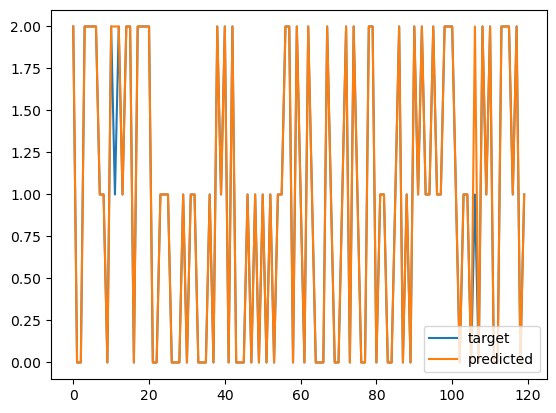

In [6]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=10000,alpha=.1,random_state=42,hidden_layer_sizes=(16,16,16))
mlp.fit(X, yts)
out=mlp.predict(X)
plt.plot(yt, label='target')
plt.plot(mlp.predict(X), label='predicted')
plt.legend()
print('How many did it miss',np.round(2*np.abs(out-yts)/3).sum())

## <font size=4 color =blue>   __We didn't scale first try that with StandardScaler.  Make sure you use  .fit_transform so we can transform the test set later.__

How many did it miss 1.0


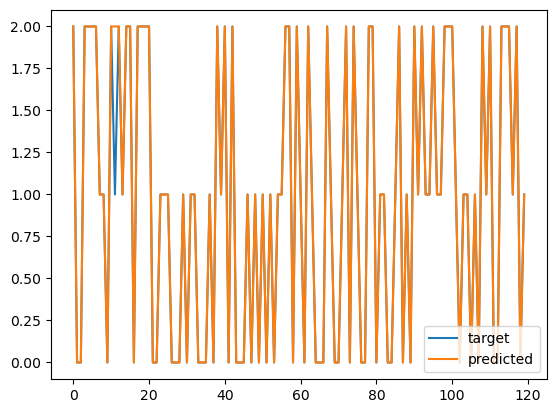

In [10]:
from sklearn.preprocessing import StandardScaler
STSC=StandardScaler()
XSS=STSC.fit_transform(X)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000,random_state=42,hidden_layer_sizes=(16,32))
mlp.fit(XSS, yts)
out=mlp.predict(XSS)
plt.plot(yt, label='target')
plt.plot(mlp.predict(XSS), label='predicted')
plt.legend()
print('How many did it miss',np.round(2*np.abs(out-yts)/3).sum())


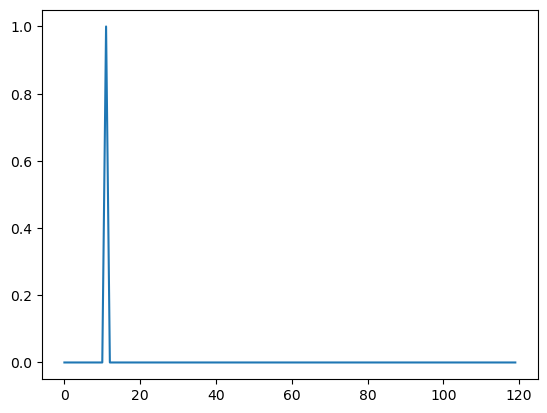

In [11]:
plt.plot(np.abs(out-yts))

<font size=4 color =blue>__Now let's see how we do on the test set.  Don't forget to scale it__ 

In [12]:
X_test_S=STSC.transform(X_test)
mlp.score(X_test_S,y_test)

0.9333333333333333


<font size=4>  Let's look at the shapes of the Matrices/vectors of the underlying model.

In [13]:
mlp.coefs_[0].shape,mlp.coefs_[1].shape,mlp.coefs_[2].shape#,mlp.coefs_[3].shape  

((4, 16), (16, 32), (32, 3))

In [14]:
mlp.intercepts_[0].shape,mlp.intercepts_[1].shape,mlp.intercepts_[2].shape

((16,), (32,), (3,))

In [15]:
mlp.coefs_

[array([[ 0.37420329,  0.64286075,  0.21010249,  0.21163456, -0.24032885,
         -0.13387895, -0.39447901,  0.26817385, -0.04050694,  0.07060097,
         -0.5648338 ,  0.62001414,  0.28378985, -0.2384046 , -0.60649776,
         -0.08180177],
        [-0.37671476,  0.11575411, -0.28668069, -0.42396501, -0.34635921,
         -0.38363965, -0.19903468, -0.35655668, -0.12380852,  0.38961277,
         -0.22858643, -0.08624672, -0.00699341, -0.61831649,  0.19132649,
         -0.53318265],
        [-0.40210993,  0.69355841,  0.78663092,  0.50723868,  0.22560825,
         -0.41414951,  0.21567085,  0.18355122, -0.51126784, -0.13354642,
         -0.63560433,  0.57407105, -0.32139928,  0.34761312, -0.39937082,
          0.45026354],
        [-0.10142905, -0.14938488,  0.80105662,  0.47303834,  0.90973801,
          0.30307052,  0.10737551,  0.71201731, -0.54344918, -0.46461795,
         -0.6419978 , -0.05930386, -0.24501725, -0.33228099,  0.18141076,
          0.30185309]]),
 array([[ 1.501364

<font size =4 color =red>  __Assignment:  Do a MLP for the digits data set with three hidden layers all of size 64.__ 

##  PERMUTATION IMPORTANCE-Bonus

<font size=4>[Feature Importance with Neural Network](https://towardsdatascience.com/feature-importance-with-neural-network-346eb6205743)
Marco Cerliani

The models identified for our experiment are doubtless Neural Networks for their reputation to be a black box algorithm. In order to demystify this stereotype, we’ll focus on Permutation Importance. Its easy implementation, combined with its tangible understanding and adaptability, making it a consistent candidate to answer the question: What features have the biggest impact on predictions?

<br>
    
Permutation importance is calculated after a model has been fitted. So we have only to squeeze it and get what we want. This method works on a simple principle: If I randomly shuffle a single feature in the data, leaving the target and all others in place, how would that affect the final prediction performances?

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=2000,alpha=.1,random_state=42,hidden_layer_sizes=(16,32))
STSC=StandardScaler()
for j in (0,1,2,3):
        for k in (0,1,2,3,4):
            XSS=STSC.fit_transform(X)
            XSSp=XSS
            np.random.shuffle(XSSp[:,j])
            mlp.fit(XSSp, yts)
            out=mlp.predict(XSSp)
            print('Shuffle Feature', j,'has', np.round(2*np.abs(out-yts)/3).sum(), 'error(s)')

Shuffle Feature 0 has 0.0 error(s)
Shuffle Feature 0 has 1.0 error(s)
Shuffle Feature 0 has 1.0 error(s)
Shuffle Feature 0 has 1.0 error(s)
Shuffle Feature 0 has 0.0 error(s)
Shuffle Feature 1 has 4.0 error(s)
Shuffle Feature 1 has 3.0 error(s)
Shuffle Feature 1 has 4.0 error(s)
Shuffle Feature 1 has 4.0 error(s)
Shuffle Feature 1 has 1.0 error(s)
Shuffle Feature 2 has 2.0 error(s)
Shuffle Feature 2 has 1.0 error(s)
Shuffle Feature 2 has 4.0 error(s)
Shuffle Feature 2 has 2.0 error(s)
Shuffle Feature 2 has 4.0 error(s)
Shuffle Feature 3 has 1.0 error(s)
Shuffle Feature 3 has 2.0 error(s)
Shuffle Feature 3 has 2.0 error(s)
Shuffle Feature 3 has 0.0 error(s)
Shuffle Feature 3 has 3.0 error(s)
